<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Logaritmico Recíproco </font> </center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
df=pd.DataFrame(data=housing.data,columns=housing.feature_names)
df[housing.target_names[0]]=housing.target

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


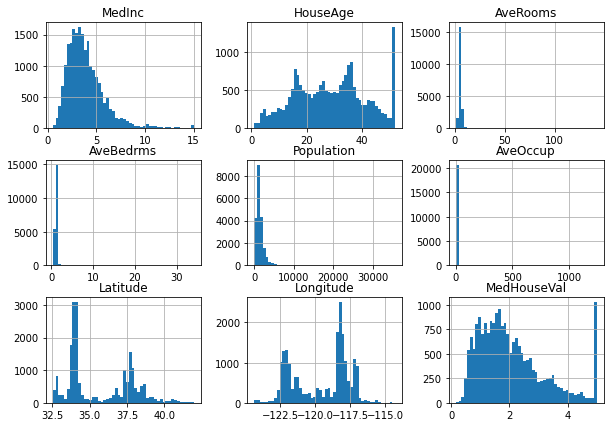

In [3]:
H=df.hist(figsize=(10,7),bins=50)

# Transformación logarítmica

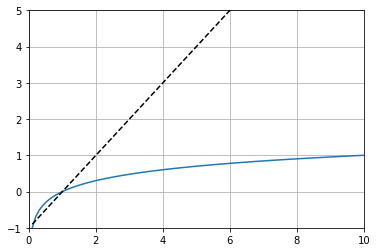

In [4]:
# Gráfica de X vs X'
x=np.linspace(0.1,10,100)
xp=np.log10(x)
plt.plot(x,xp)
plt.plot(x,x-1,'--k')
plt.axis([0,10,-1,5])
plt.grid()

In [7]:
df - df.min() +1 


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.8253,41.0,7.137973,1.690476,320.0,2.863248,6.34,3.12,5.37601
1,8.8015,21.0,6.391983,1.638547,2399.0,2.417534,6.32,3.13,4.43501
2,7.7575,52.0,8.441982,1.740113,494.0,3.109952,6.31,3.11,4.37101
3,6.1432,52.0,5.971198,1.739726,556.0,2.855638,6.31,3.10,4.26301
4,4.3463,52.0,6.435699,1.747748,563.0,2.489159,6.31,3.10,4.27201
...,...,...,...,...,...,...,...,...,...
20635,2.0604,25.0,5.199301,1.800000,843.0,2.868298,7.94,4.26,1.63101
20636,3.0569,18.0,6.267881,1.982456,354.0,3.430499,7.95,4.14,1.62101
20637,2.2001,17.0,5.359389,1.786759,1005.0,2.633327,7.89,4.13,1.77301
20638,2.3673,18.0,5.483359,1.838586,739.0,2.430901,7.89,4.03,1.69701


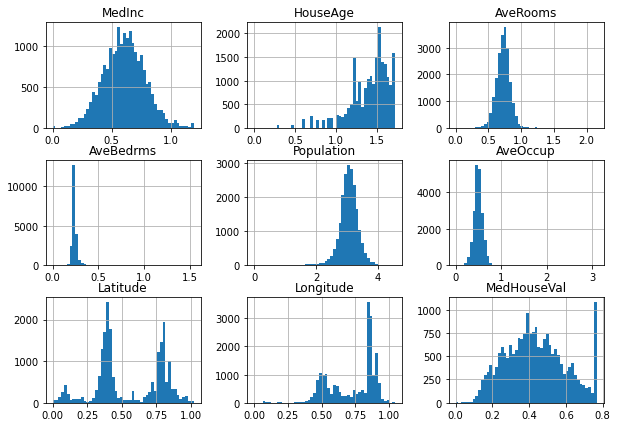

In [8]:
#df_log=df.copy()
df_log=np.log10(df-df.min()+1)
H=df_log.hist(figsize=(10,7),bins=50)

In [9]:
sesgo=df.skew()
sesgo

MedInc          1.646657
HouseAge        0.060331
AveRooms       20.697869
AveBedrms      31.316956
Population      4.935858
AveOccup       97.639561
Latitude        0.465953
Longitude      -0.297801
MedHouseVal     0.977763
dtype: float64

In [10]:
sesgo_log=df_log.skew()
sesgo_log

MedInc         0.078282
HouseAge      -1.289170
AveRooms       0.959245
AveBedrms      8.298256
Population    -1.140433
AveOccup       2.662098
Latitude      -0.080214
Longitude     -0.745362
MedHouseVal    0.237146
dtype: float64

# Transformación recíproca

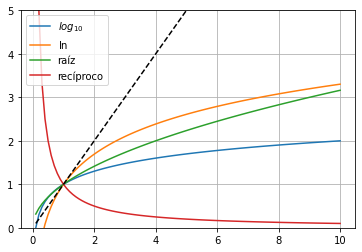

In [11]:
# Gráfica X vs X'
plt.plot(x,xp+1,label='$log_{10}$')
plt.plot(x,np.log(x)+1,label='$\ln$')
plt.plot(x,np.sqrt(x),label='raíz')
plt.plot(x,1/x,label='recíproco')
plt.plot(x,x,'--k')
plt.ylim([0,5])
plt.legend()
plt.grid()

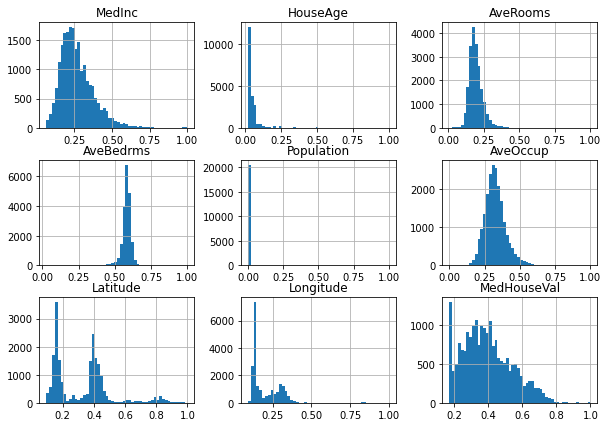

In [12]:
df_r=1/(df-df.min()+1)
H=df_r.hist(figsize=(10,7),bins=50)

In [13]:
sesgo

MedInc          1.646657
HouseAge        0.060331
AveRooms       20.697869
AveBedrms      31.316956
Population      4.935858
AveOccup       97.639561
Latitude        0.465953
Longitude      -0.297801
MedHouseVal     0.977763
dtype: float64

In [14]:
sesgo_log

MedInc         0.078282
HouseAge      -1.289170
AveRooms       0.959245
AveBedrms      8.298256
Population    -1.140433
AveOccup       2.662098
Latitude      -0.080214
Longitude     -0.745362
MedHouseVal    0.237146
dtype: float64

In [15]:
sesgo_r=df_r.skew()
sesgo_r

MedInc          1.329928
HouseAge        5.719626
AveRooms        1.864921
AveBedrms      -3.911728
Population     80.838678
AveOccup        0.612341
Latitude        1.097306
Longitude       2.185543
MedHouseVal     0.507905
dtype: float64

# Regresión

In [16]:
idx_transformacion=np.argmin((np.abs(sesgo),np.abs(sesgo_log),np.abs(sesgo_r)),axis=0)
idx_transformacion

array([1, 0, 1, 2, 1, 2, 1, 0, 1], dtype=int64)

In [17]:
# Aplicamos logaritmo a las variables 0,2,4,6 y 8.
# Recíproco a las variables 3 y 5.
# Y ninguna transformación a las variables 1 y 7
#
transformacion=(lambda x:x,
                lambda x:np.log10(x-x.min()+1),
                lambda x: 1/(x-x.min()+1))
df_t=df.copy()
for i,x in enumerate(df.columns):
    df_t[x]=transformacion[idx_transformacion[i]](df[x])
df_t.skew()

MedInc         0.078282
HouseAge       0.060331
AveRooms       0.959245
AveBedrms     -3.911728
Population    -1.140433
AveOccup       0.612341
Latitude      -0.080214
Longitude     -0.297801
MedHouseVal    0.237146
dtype: float64

In [18]:
lin=LinearRegression()
lin.fit(df.drop(columns='MedHouseVal'),df.MedHouseVal)

LinearRegression()

In [19]:
idx_transformacion[-1] # Transformación para MedHouseVal -> log10

1

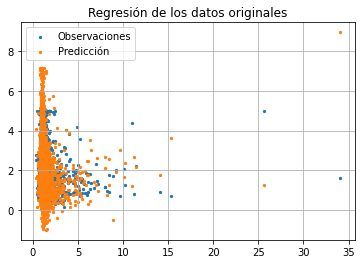

In [20]:
plt.scatter(df['AveBedrms'],df['MedHouseVal'],s=5,label='Observaciones')
prediccion=lin.predict(df.drop(columns='MedHouseVal'))
plt.scatter(df['AveBedrms'],prediccion,label='Predicción',s=5)
plt.legend()
plt.title('Regresión de los datos originales')
plt.grid()

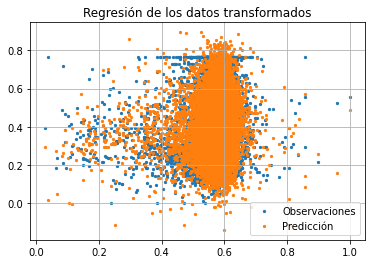

In [21]:
lin_t=LinearRegression()
lin_t.fit(df_t.drop(columns='MedHouseVal'),df_t.MedHouseVal)

plt.scatter(df_t['AveBedrms'],df_t['MedHouseVal'],s=5,label='Observaciones')
prediccion=lin_t.predict(df_t.drop(columns='MedHouseVal'))
plt.scatter(df_t['AveBedrms'],prediccion,label='Predicción',s=5)
plt.legend()
plt.title('Regresión de los datos transformados')
plt.grid()

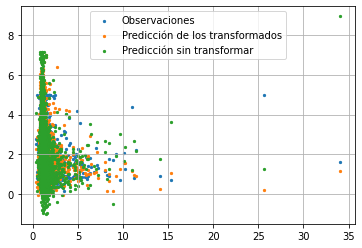

In [22]:
plt.scatter(df['AveBedrms'],df['MedHouseVal'],s=5,label='Observaciones')
prediccion_t=10**(lin_t.predict(df_t.drop(columns='MedHouseVal')))+df.MedHouseVal.min()-1
prediccion=lin.predict(df.drop(columns='MedHouseVal'))
plt.scatter(df['AveBedrms'],prediccion_t,label='Predicción de los transformados',s=5)
plt.scatter(df['AveBedrms'],prediccion,label='Predicción sin transformar',s=5)
plt.legend()
plt.grid()

## Ejemplo Regresión para una variable

In [23]:
# Regresión para una variable
#
df = pd.read_csv('regresion.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


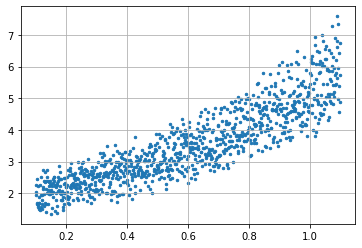

In [26]:
plt.scatter(df.x,df.y, s=6)
plt.grid()

<AxesSubplot:>

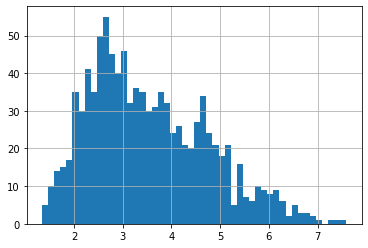

In [27]:
df.y.hist(bins=50)

In [28]:
df.y.skew()

0.6089606600475832

### Qué transformación elegir? (t_log10, t_r)

In [ ]:
def transformacion(df):
    
    return df_t

In [30]:
y = df.y - df.y.min() + 1
transformaciones_sesgo = (np.log10(y).skew(), (1/y).skew())

In [32]:
np.abs(transformaciones_sesgo)

array([0.15922701, 1.08051661])

In [33]:
df['y_t'] = np.log10(y)

In [34]:
df

,x,y,y_t
0,0.100000,1.932916,0.201353
1,0.101001,2.242087,0.278527
2,0.102002,2.022414,0.225138
3,0.103003,1.692315,0.130089
4,0.104004,1.672025,0.123508
...,...,...,...
995,1.095996,4.563710,0.625378
996,1.096997,6.415678,0.783375
997,1.097998,6.760265,0.807345
998,1.098999,5.750018,0.732952


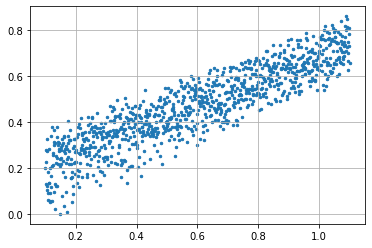

In [35]:
# Gráfica de los datos transformados
plt.scatter(df.x,df.y_t, s=6)
plt.grid()

### aplicar un algo ML regresión Lineal a datos transformados y encontrar su accuracy, compararlo con una regresión Lineal sin transformación

### comparar la variable de salida y la variable que se obtenga apartir de la transformación

In [ ]:
# Gráfica de los datos destransformados
